In [73]:
import numpy as np
import matplotlib.pyplot as plt
from axessettings import AxesSetting
import pandas as pd

## (1)
オフセット調整の抵抗値：

どの程度？
時計回りに回すと下がる
GB(ゲインバンド)積一定
ユニティゲイン周波数 700kHz


## (2)
見る周波数

線形性保たれる？
(a)利得20dB→抵抗比10
(b)40dB→比100

In [74]:
fp = 5
wp = 2*np.pi*fp
A0 = 10**(106/20)
def A(f):
    return A0/(1+1j*(2*np.pi*f)/wp)
gain_dB = lambda f: 20*np.log10(np.abs(A(f)))
f_u = A0*fp
print(f"$f_u$ = {f_u:.3} Hz")

$f_u$ = 9.98e+05 Hz


In [75]:
#(a)
R1 = 989.3
R2=  9738
RR = R2/R1

gain_dB_20_theory = lambda f: 20*np.log10(abs(-RR/(1+(1+RR)/A(f))))
gain_phase_20_theory = lambda f: np.angle(-RR/(1+(1+RR)/A(f)))/np.pi*180
print(gain_dB_20_theory(1e6))

-0.8976243084998891


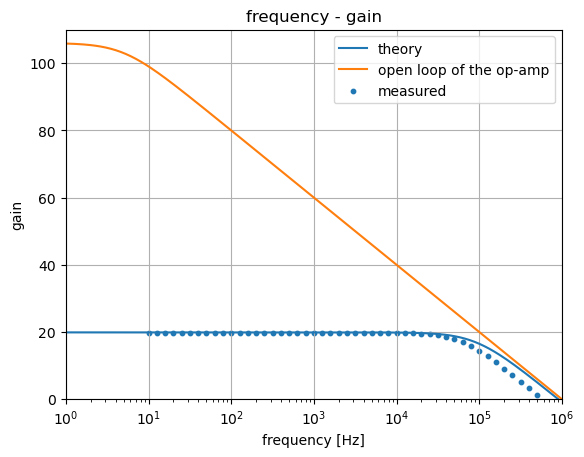

In [76]:
gain_20 = pd.read_csv("1_bode_invert_1k_10k.csv")

fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", grid="both", xlim=(1,1e6), ylim=(0,110),xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_dB_20_theory, label="theory")
axstg.plot_func(ax, gain_dB, label="open loop of the op-amp")
ax.scatter(gain_20["freq"], 20*np.log10(gain_20["gain"]), s=10,label="measured")
axstg.apply_axes(ax)

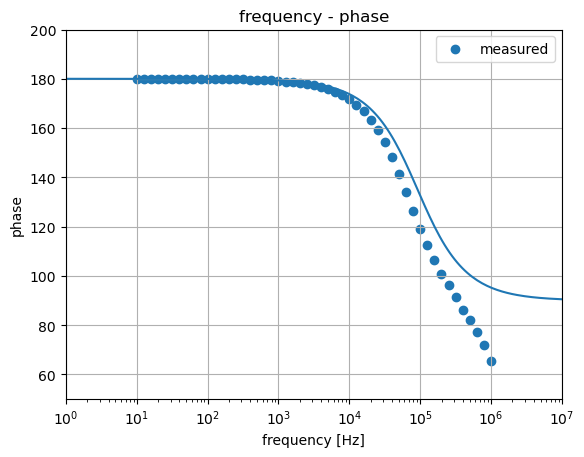

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase", grid="both", xlim=(1,1e7),ylim=(50,200),xscale="log", title="frequency - phase")
axstg.plot_func(ax, gain_phase_20_theory)
ax.scatter(gain_20["freq"], gain_20["phase"]+360, label="measured")
axstg.apply_axes(ax)

In [78]:
#(b)
R1 = 1001
R2=  99740
RR2 = R2/R1

gain_dB_40_theory = lambda f: 20*np.log10(abs(-RR2/(1+(1+RR2)/A(f))))
gain_phase_40_theory = lambda f: np.angle(-RR2/(1+(1+RR2)/A(f)))/np.pi*180
print(gain_dB_40_theory(1e6))

-0.10776495242812893


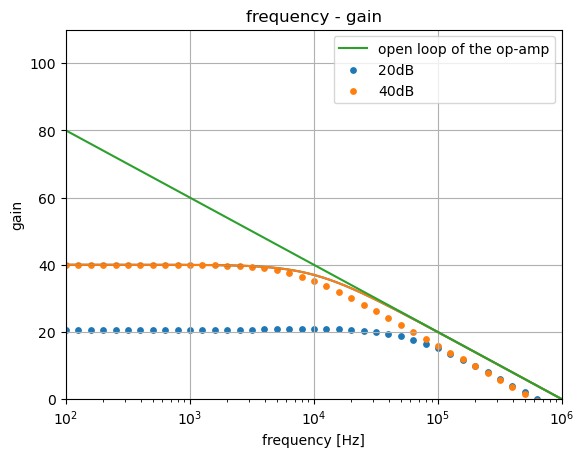

In [97]:
gain_40 = pd.read_csv("1_bode_invert_1k_100k.csv")


fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", grid="both", xlim=(1e2,1e6), ylim=(0,110),xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_dB_20_theory)
axstg.plot_func(ax, gain_dB_40_theory)
axstg.plot_func(ax, gain_dB, label="open loop of the op-amp")
ax.scatter(gain_20["freq"], 20*np.log10(gain_20["gain"]), label="20dB",s=15)
ax.scatter(gain_40["freq"], 20*np.log10(gain_40["gain"]), label="40dB",s=15)
axstg.apply_axes(ax)

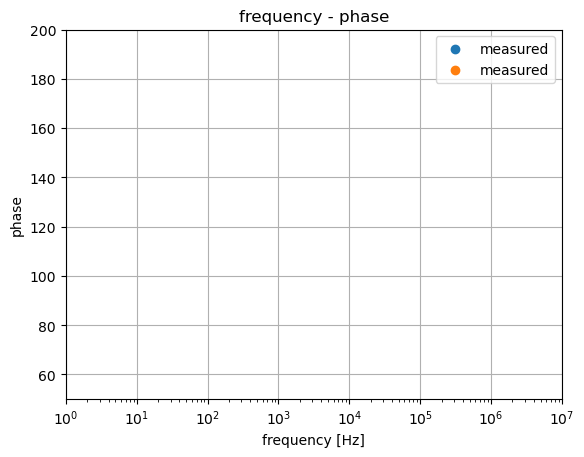

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase", grid="both", xlim=(1,1e7),ylim=(50,200),xscale="log", title="frequency - phase")
axstg.plot_func(ax, gain_phase_20_theory)
axstg.plot_func(ax, gain_phase_40_theory)
ax.scatter(gain_20["freq"], gain_20["phase"], label="measured")
ax.scatter(gain_40["freq"], gain_40["phase"], label="measured")
axstg.apply_axes(ax)

## (3)
周波数を変化させたときの波形変化の様子

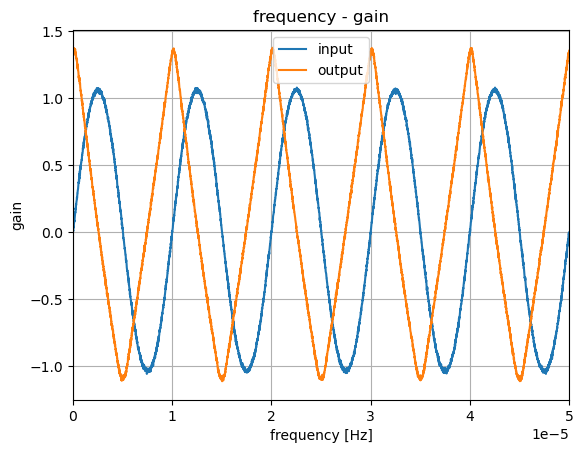

In [81]:
tri = pd.read_csv("1_bode_1k_100k_100kHztriangle.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", grid="both", xlim=(0,0.00005),title="frequency - gain")
ax.plot(tri["freq"], tri["CH1"], label="input")
ax.plot(tri["freq"], tri["CH2"]+12, label="output")
axstg.apply_axes(ax)

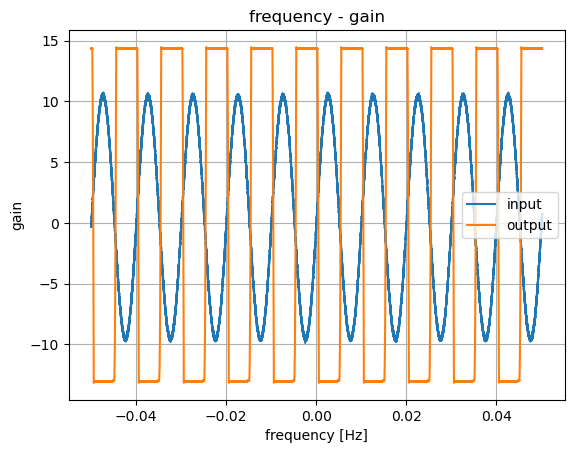

In [82]:
tri = pd.read_csv("1_bode_1k_100k_100capped.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", grid="both",title="frequency - gain")
ax.plot(tri["freq"], tri["CH1"]*100, label="input")
ax.plot(tri["freq"], tri["CH2"], label="output")
axstg.apply_axes(ax)

## (4)
非反転

(a)抵抗比
(b)抵抗比

周波数に対する波形の変化


In [83]:
#(a)
Rr = 1001
Rf = 9738
RR = (Rf+Rr)/Rr 
gain_dB_20_theory = lambda f: 20*np.log10(abs(RR*A(f)*RR**-1/(1+A(f)*RR**-1)))
gain_phase_20_theory = lambda f: np.angle(RR*A(f)*RR**-1/(1+A(f)*RR**-1))/np.pi*180

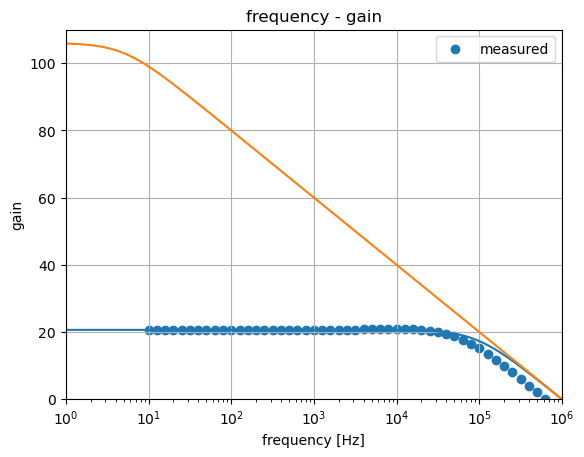

In [84]:
gain_20 = pd.read_csv("1_bode_noinvert_1k_10k.csv")


fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", grid="both", xlim=(1,1e6), ylim=(0,110),xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_dB_20_theory)
axstg.plot_func(ax, gain_dB)
ax.scatter(gain_20["freq"], 20*np.log10(gain_20["gain"]), label="measured")
axstg.apply_axes(ax)

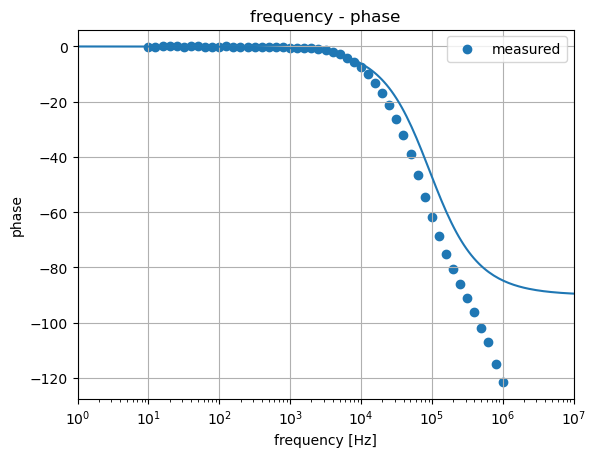

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase", grid="both", xlim=(1,1e7),xscale="log", title="frequency - phase")
axstg.plot_func(ax, gain_phase_20_theory)
ax.scatter(gain_20["freq"], gain_20["phase"], label="measured")
axstg.apply_axes(ax)

In [86]:
#(b)
Rf = 99090
RR = (Rf+Rr)/Rr 
gain_dB_40_theory = lambda f: 20*np.log10(abs(RR*A(f)*RR**-1/(1+A(f)*RR**-1)))
gain_phase_40_theory = lambda f: np.angle(RR*A(f)*RR**-1/(1+A(f)*RR**-1))/np.pi*180

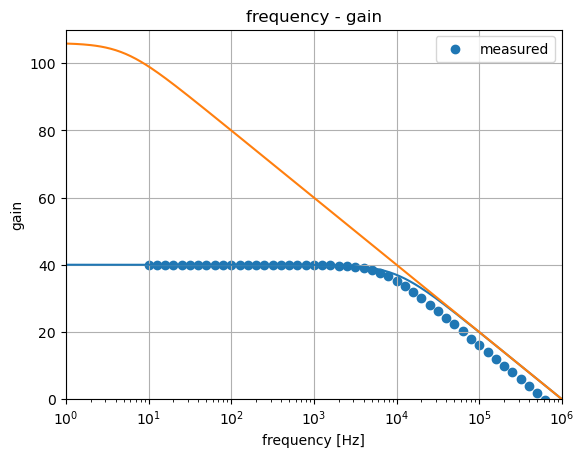

In [87]:
gain_40 = pd.read_csv("1_bode_noinvert_1k_100k.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", grid="both", xlim=(1,1e6), ylim=(0,110),xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_dB_40_theory)
axstg.plot_func(ax, gain_dB)
ax.scatter(gain_40["freq"], 20*np.log10(gain_40["gain"]), label="measured")
axstg.apply_axes(ax)

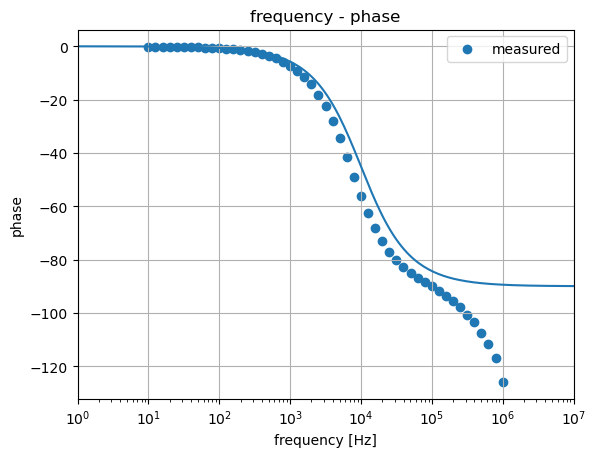

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase", grid="both", xlim=(1,1e7),xscale="log", title="frequency - phase")
axstg.plot_func(ax, gain_phase_40_theory)
ax.scatter(gain_40["freq"], gain_40["phase"], label="measured")
axstg.apply_axes(ax)

In [89]:
#開ループ特性


# (5)
微分回路

f_r:
f_f:

In [90]:
Rr = 9981
Rf = 99090
Cr = 2.186e-7
Cf = 2e-10
fr = 1/(2*np.pi*Rr*Cr)
ff = 1/(2*np.pi*Rf*Cf)  
print(f"f_r = {fr:.3} Hz")
print(f"f_f = {ff:.3} Hz")
print(f"f_peak = {np.sqrt((A0*wp)/(Cr*Rf))/2/np.pi:.3} Hz")

f_r = 72.9 Hz
f_f = 8.03e+03 Hz
f_peak = 2.71e+03 Hz


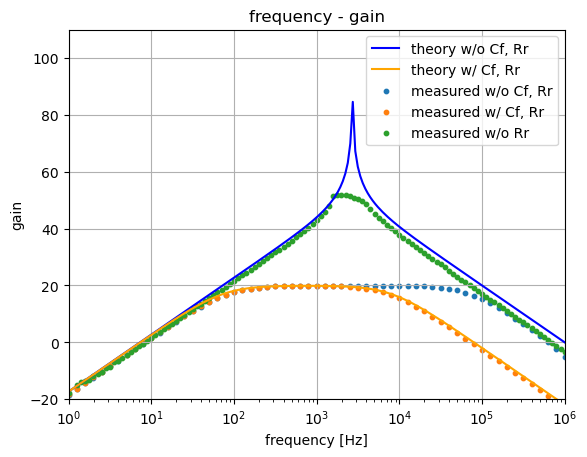

In [91]:
#(Cf,Rr無し)
def b(f):
    return 1/(1+1j*(2*np.pi*f*Cr*Rf))
gain_noCR = lambda f: 20*np.log10(np.abs(-1j*2*np.pi*f*Cr*Rf*A(f)*b(f)/(1+A(f)*b(f))))
data_noCR = pd.read_csv("2_bode_derv_woutcf.csv")
#Rrだけ無し
data_noR = pd.read_csv("2_bode_derv_woutf_wider.csv")
# gain_noR = lambda f: 20*np.log10(np.abs(A0/(1+1j*(2*np.pi*f/wp))/(1+1j*(2*np.pi*Cr*Rf*f))/(1+A0/(1+1j*(2*np.pi*f/wp))/(1+1j*(2*np.pi*Cr*Rf*f)))*(1+1j*(2*np.pi*Cr*Rf*f))))

#(Cf,Rr有り)
gain_CR = lambda f: 20*np.log10(np.abs(-1j*(2*np.pi*f*Cr*Rf)/(1+1j*(2*np.pi*f*Cr*Rr))/(1+1j*(2*np.pi*f*Cf*Rf))))
dt = lambda f: 20*np.log10(np.abs(-1j*(2*np.pi*f*Cr*Rf)/(1+1j*(2*np.pi*f*Cr*0))/(1+1j*(2*np.pi*f*0*Rf))))
data_CR = pd.read_csv("2_bode_derv.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", grid="both", xlim=(1,1e6),ylim=(-20,110), xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_noCR, c="b", label = "theory w/o Cf, Rr")
axstg.plot_func(ax, gain_CR, c="orange", label="theory w/ Cf, Rr")
ax.scatter(data_noCR["freq"], 20*np.log10(data_noCR["gain"]), s=10, label="measured w/o Cf, Rr")
ax.scatter(data_CR["freq"], 20*np.log10(data_CR["gain"]), s=10,label="measured w/ Cf, Rr")
ax.scatter(data_noR["freq"], 20*np.log10(data_noR["gain"]), s=10,label="measured w/o Rr")
# axstg.plot_func(ax, gain_noR, c="g")
# axstg.plot_func(ax, gain_dB)
# axstg.plot_func(ax, dt, c="g")
# ax.axvline(3.22e3, c="black", alpha=0.4, label="peak: 3.22e3[Hz]")
# ax.axvline(93.6, c="black", alpha=0.4, label="fr: 93.6[Hz]")
# ax.axvline(9.82e3, c="black", alpha=0.4, label="ff: 9.82e3[Hz]")
axstg.apply_axes(ax)

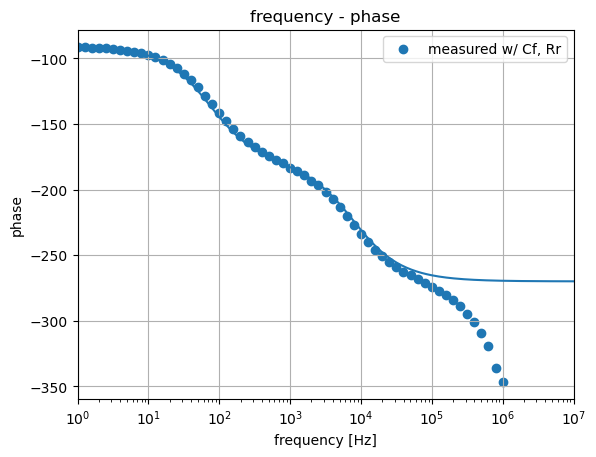

In [92]:
def adjust(phases):
    for i in range (len(phases)):
        if phases[i] > 0:
            phases[i] -= 360
    return phases
def gain_CR_phase(f):
    return np.angle(-1j*(2*np.pi*f*Cr*Rf)/(1+1j*(2*np.pi*f*Cr*Rr))/(1+1j*(2*np.pi*f*Cf*Rf)))/np.pi*180
# gain_CR_phase = lambda f: (lambda phase: phase if phase <= 0 else phase - 360)(np.angle(-1j*(2*np.pi*f*Cr*Rf)/(1+1j*(2*np.pi*f*Cr*Rr))/(1+1j*(2*np.pi*f*Cf*Rf)),deg=True))
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase", grid="both", xlim=(1,1e7),xscale="log", title="frequency - phase")
x = np.array(np.geomspace(1, 1e7, 200))
ax.plot(x, adjust(gain_CR_phase(x)))
ax.scatter(data_CR["freq"], data_CR["phase"], label="measured w/ Cf, Rr")
axstg.apply_axes(ax)


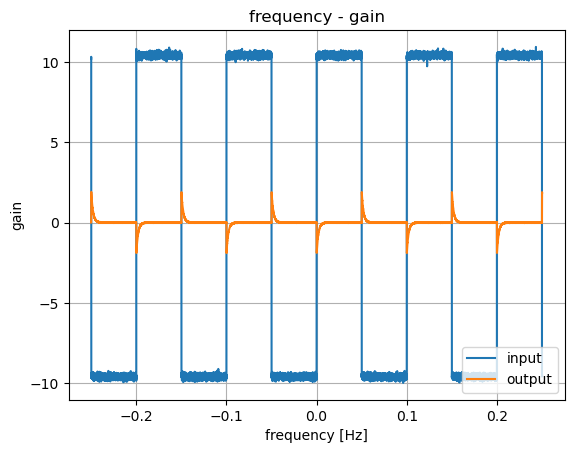

In [93]:
#方形波 微分領域
derv = pd.read_csv("2_osc_derv_200mVpp_10Hz.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", grid="both",title="frequency - gain")
ax.plot(derv["freq"], derv["CH1"]*100, label="input")
ax.plot(derv["freq"], derv["CH2"], label="output")
axstg.apply_axes(ax)

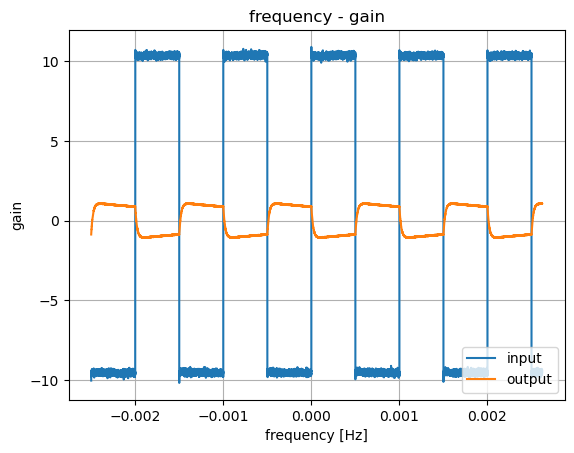

In [94]:
#方形波 非反転領域
noinv = pd.read_csv("2_osc_derv_200mVpp_1kHz.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", grid="both",title="frequency - gain")
ax.plot(noinv["freq"], noinv["CH1"]*100, label="input")
ax.plot(noinv["freq"], noinv["CH2"], label="output")
axstg.apply_axes(ax)

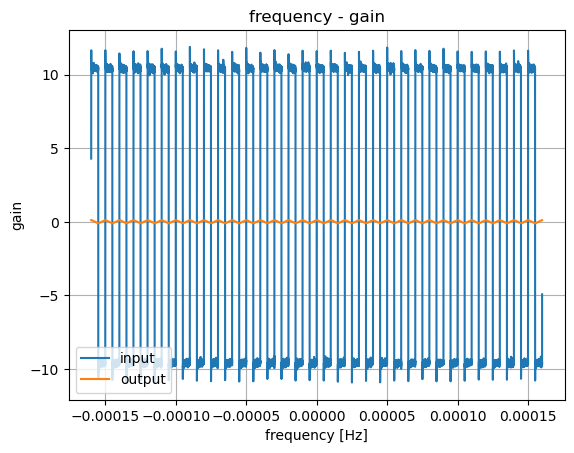

In [95]:
#方形波 積分領域
integral = pd.read_csv("2_osc_derv_200mVpp_100kHz.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", grid="both",title="frequency - gain")
ax.plot(integral["freq"], integral["CH1"]*100, label="input")
ax.plot(integral["freq"], integral["CH2"], label="output")
axstg.apply_axes(ax)